In [45]:
from wrangle import split_data, wrangle_zillow, scale_data
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Wrangle Zillow Data

In [30]:
df = wrangle_zillow()

Using cached data


In [31]:
train, validate, test = split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [41]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [66]:
#train = remove_outliers_v2(train, 1.5, train.columns[1:-1])

### Apply scalars from lesson and visualize: Min-Max, Standard, and Robust

#### Min Max

In [48]:
columns = ['bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value','tax_amount',
       'year_built']

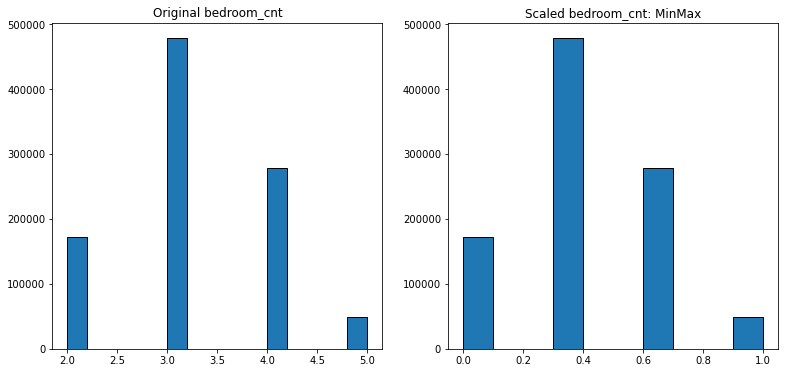

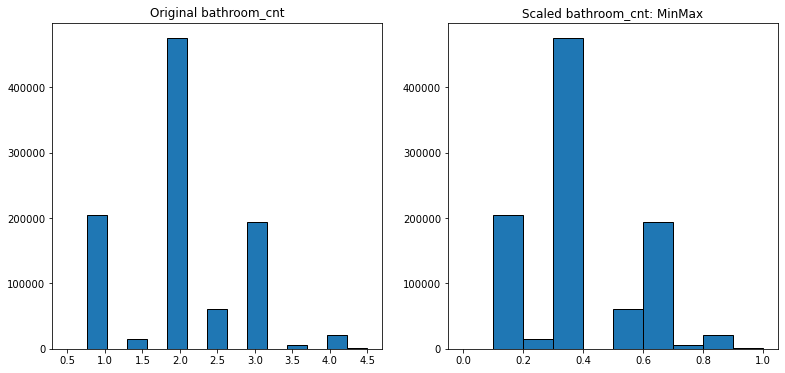

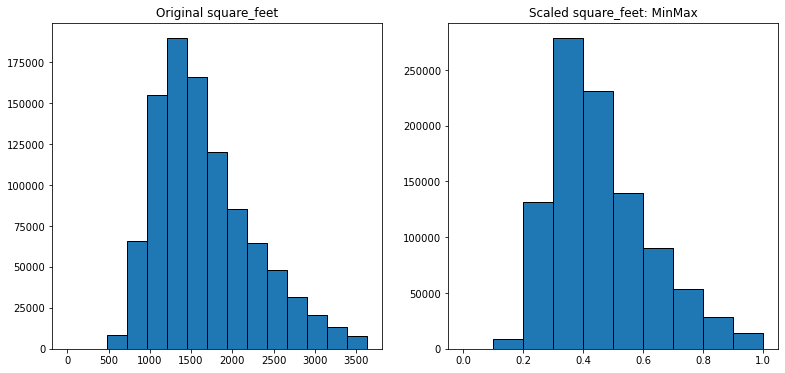

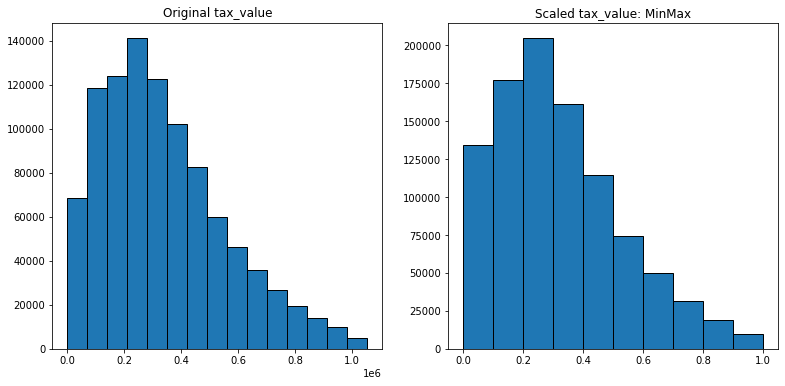

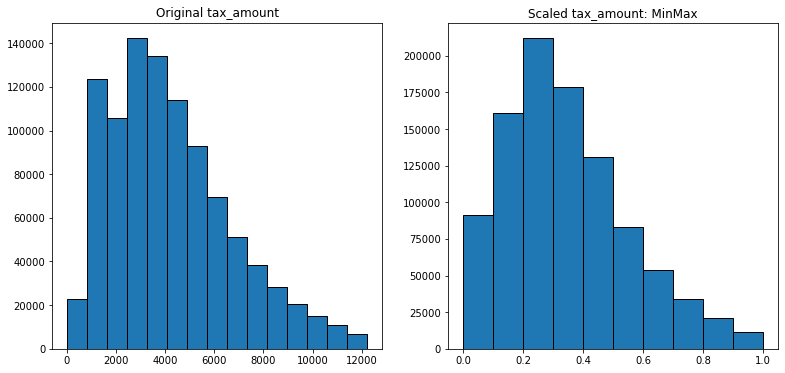

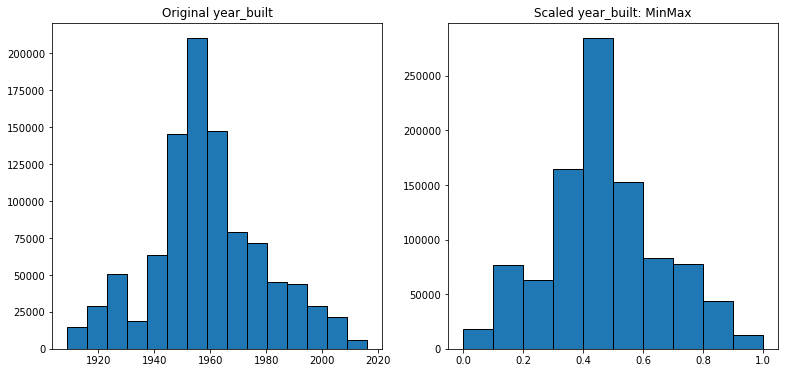

In [49]:
for col in columns:
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=15, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=10, ec='black')
    plt.title(f'Scaled {col}: MinMax')
    plt.show()

#### Standard Scaler

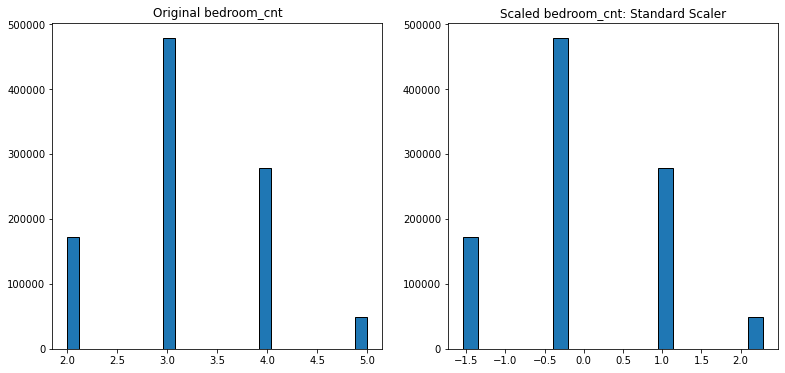

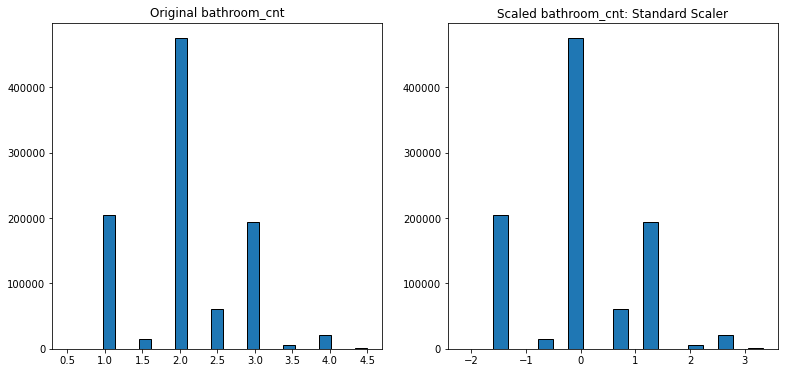

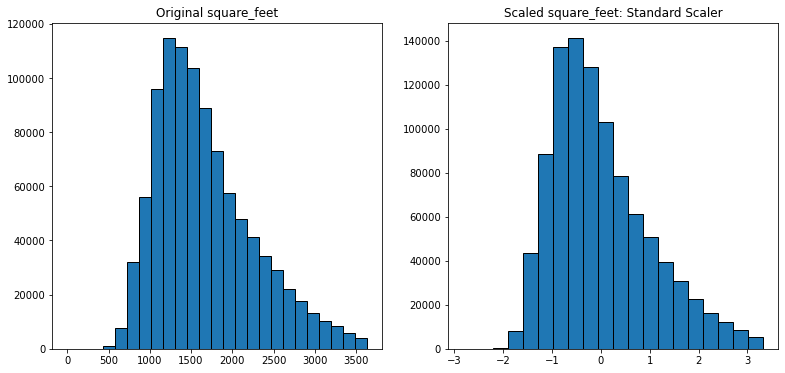

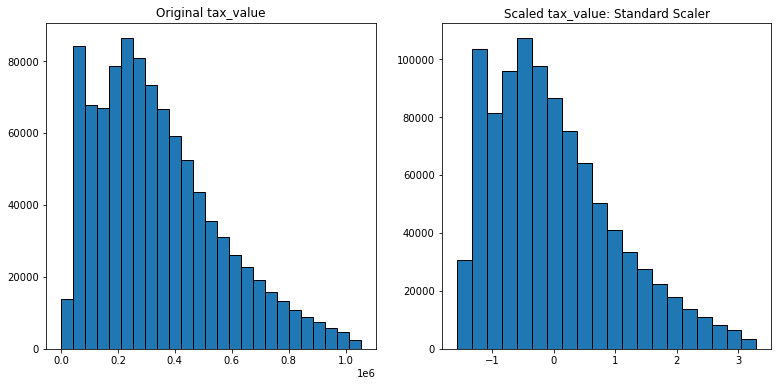

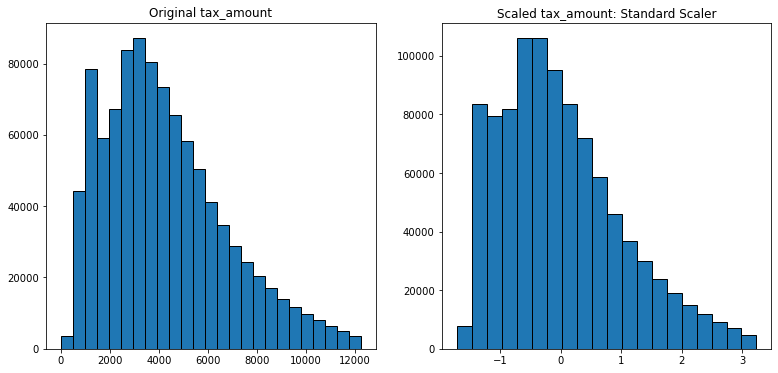

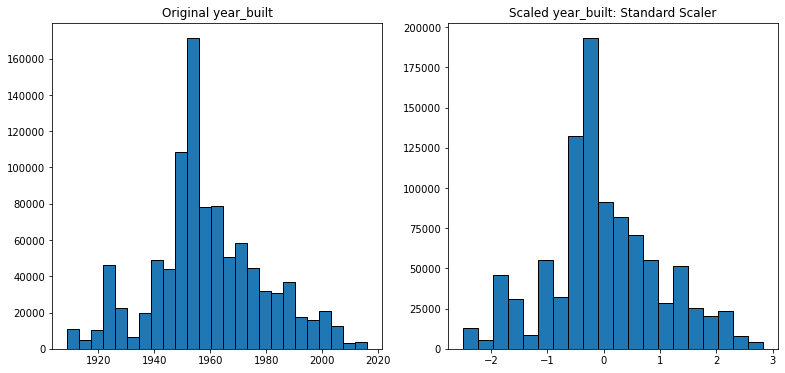

In [50]:
for col in columns:
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=20, ec='black')
    plt.title(f'Scaled {col}: Standard Scaler')
    plt.show()

#### Robust

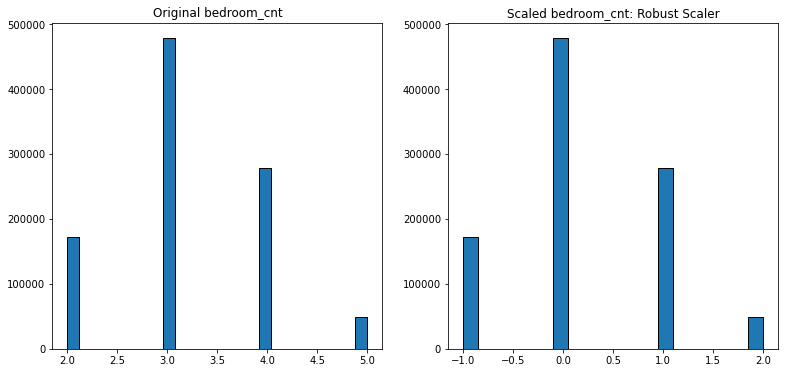

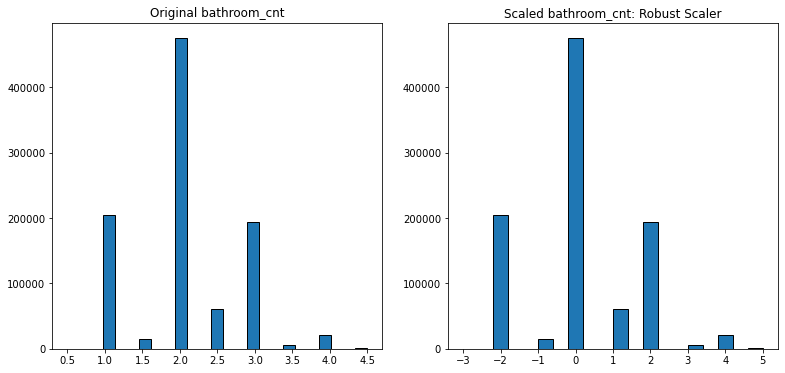

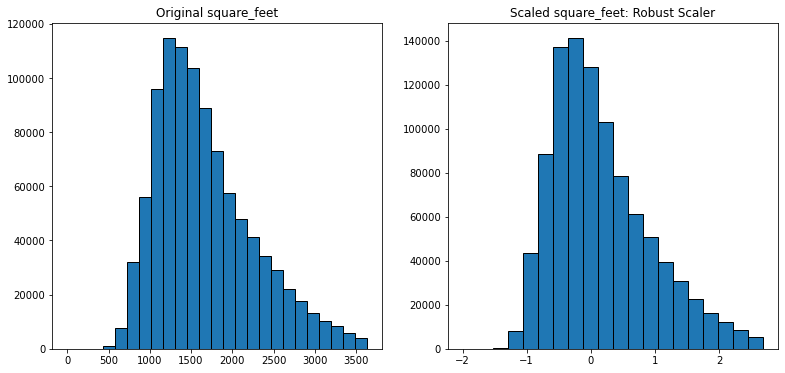

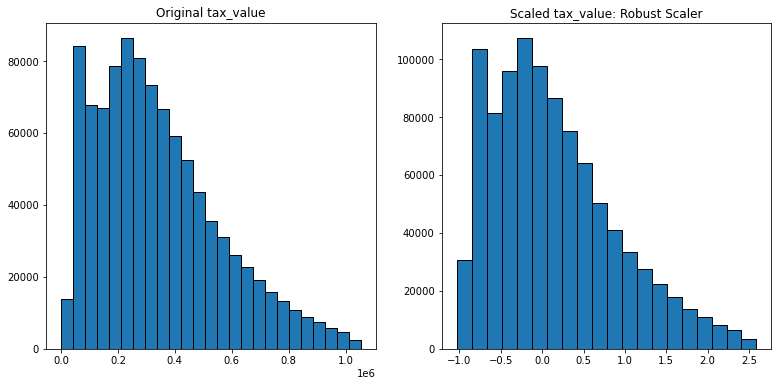

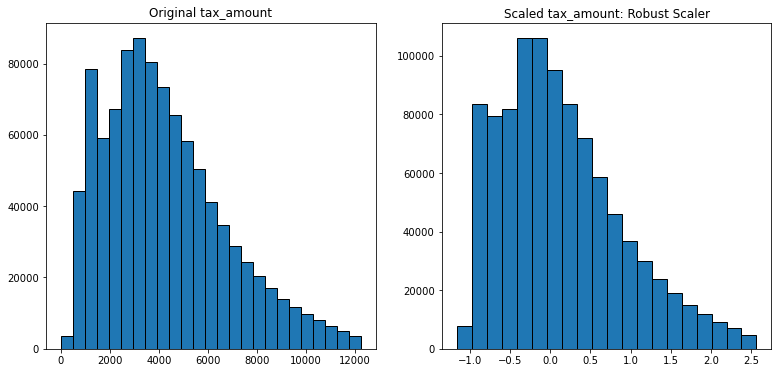

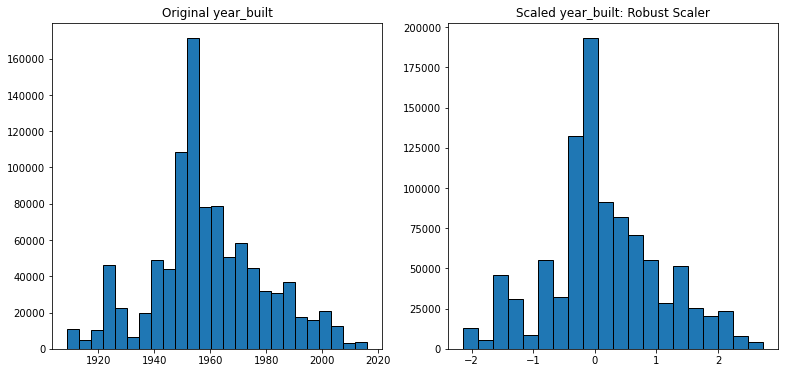

In [51]:
for col in columns:
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, bins=20, ec='black')
    plt.title(f'Scaled {col}: Robust Scaler')
    plt.show()

### 2. Inverse Transform

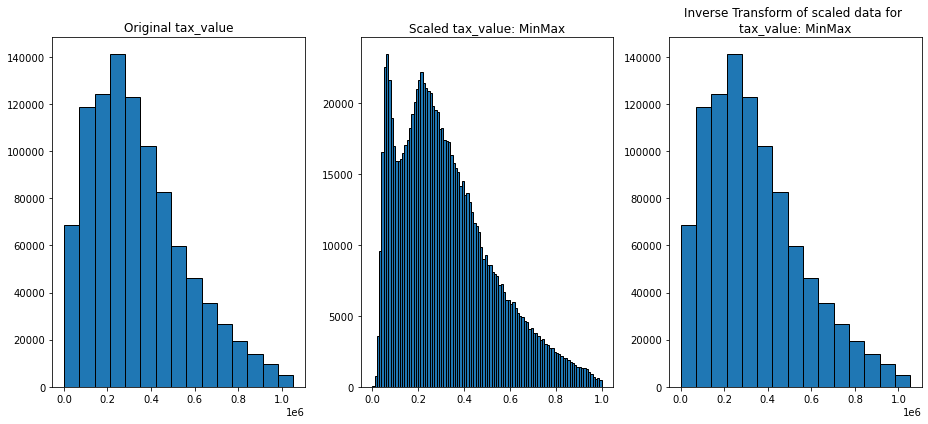

In [52]:
# for col in columns:
col = 'tax_value'
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[[col]])
train_scaled = scaler.transform(train[[col]])
inverse_train_scaled = scaler.inverse_transform(train_scaled)
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train[col], bins=15, ec='black')
plt.title(f'Original {col}')
plt.subplot(132)
plt.hist(train_scaled, bins=100, ec='black')
plt.title(f'Scaled {col}: MinMax')
plt.subplot(133)
plt.hist(inverse_train_scaled, bins=15, ec='black')
plt.title(f'Inverse Transform of scaled data for \n{col}: MinMax')
plt.tight_layout()
plt.show()

In [53]:
both = train[[col]]

both["inverse_train_scaled"] = inverse_train_scaled

both["difference"] = both.inverse_train_scaled - both.tax_value

/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_93203/3142249996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both["inverse_train_scaled"] = inverse_train_scaled
/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_93203/3142249996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both["difference"] = both.inverse_train_scaled - both.tax_value


In [54]:
both.difference.mean()

5.57331685599864e-14

### Using Tax Value as an example -  after applying the inverse transform to the scaled data the resulting dataset appears to be extremely close to the original but a very slight difference (average difference of -1.348985242062614e-13)

### For bedroom count

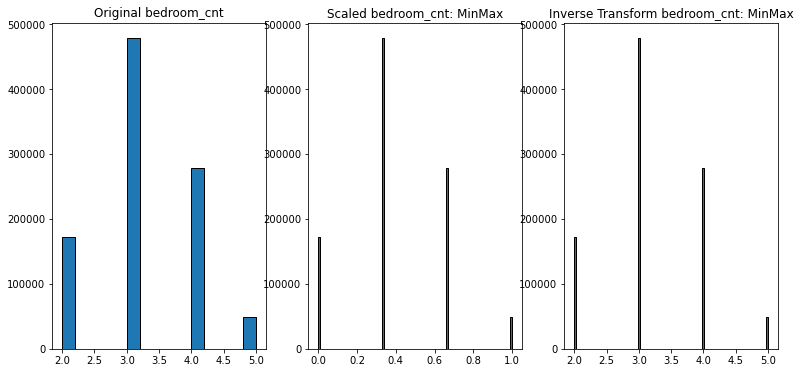

In [56]:
# for col in columns:
col = 'bedroom_cnt'
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[[col]])
train_scaled = scaler.transform(train[[col]])
inverse_train_scaled = scaler.inverse_transform(train_scaled)
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train[col], bins=15, ec='black')
plt.title(f'Original {col}')
plt.subplot(132)
plt.hist(train_scaled, bins=100, ec='black')
plt.title(f'Scaled {col}: MinMax')
plt.subplot(133)
plt.hist(inverse_train_scaled, bins=100, ec='black')
plt.title(f'Inverse Transform {col}: MinMax')
plt.show()

In [57]:
both = train[[col]]

both["inverse_train_scaled"] = inverse_train_scaled

both["difference"] = both.inverse_train_scaled - both.bedroom_cnt

/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_93203/3512260936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both["inverse_train_scaled"] = inverse_train_scaled
/var/folders/tt/99v8dp0d60sfw82fs51dhr4m0000gn/T/ipykernel_93203/3512260936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both["difference"] = both.inverse_train_scaled - both.bedroom_cnt


In [58]:
both.difference.min()

0.0

### Well for bedroom count they are exactly the same - maybe because it's an integer?

# 3. Quantile Transformer using normal for output_distribution. Apply scaler to data, visualize

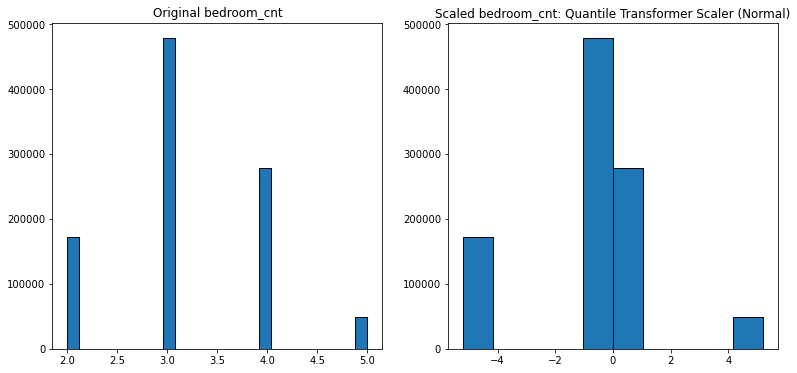

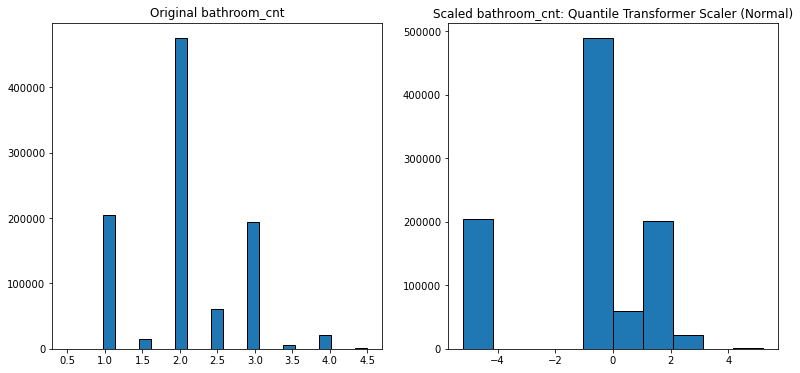

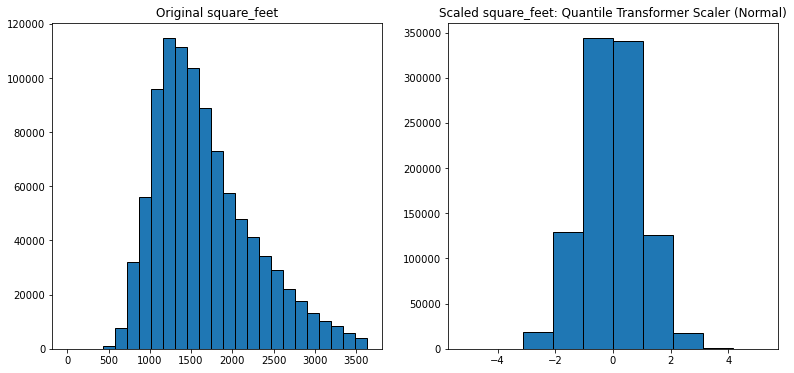

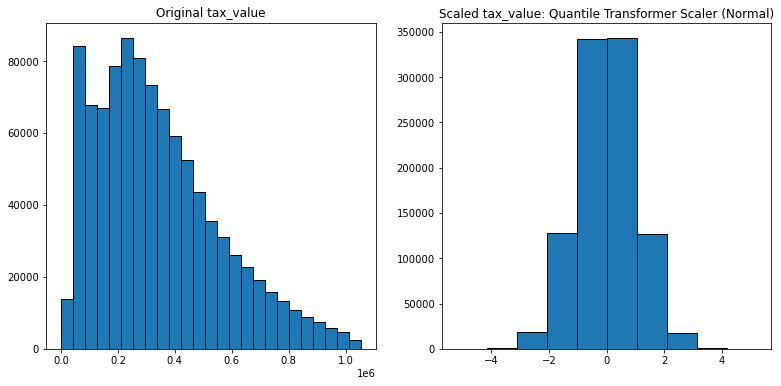

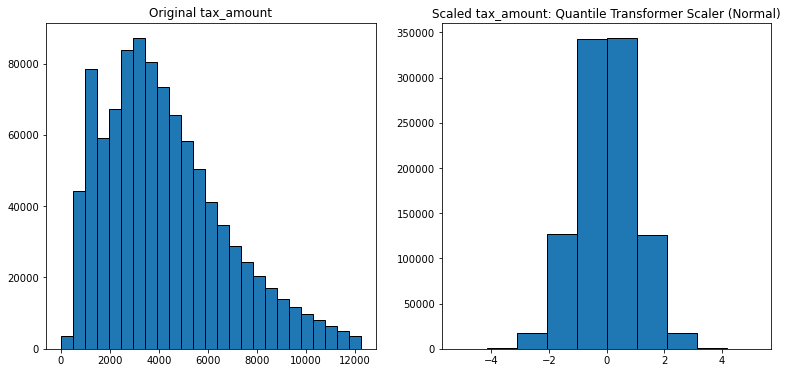

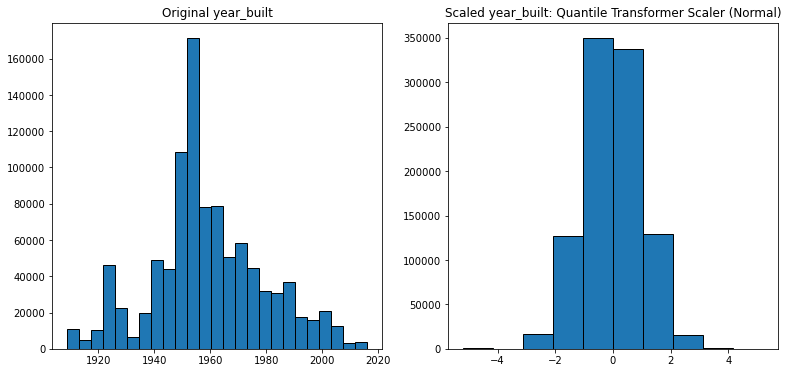

In [60]:
for col in columns:
    scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled, ec='black')
    plt.title(f'Scaled {col}: Quantile Transformer Scaler (Normal)')
    plt.show()

### ->Quantile Transform certainly makes the data look normalized

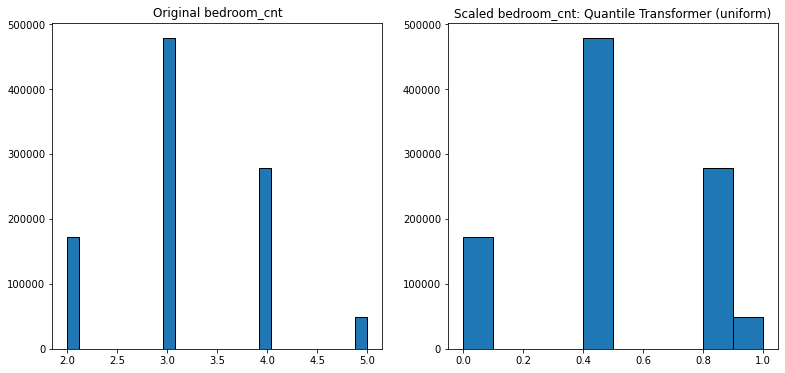

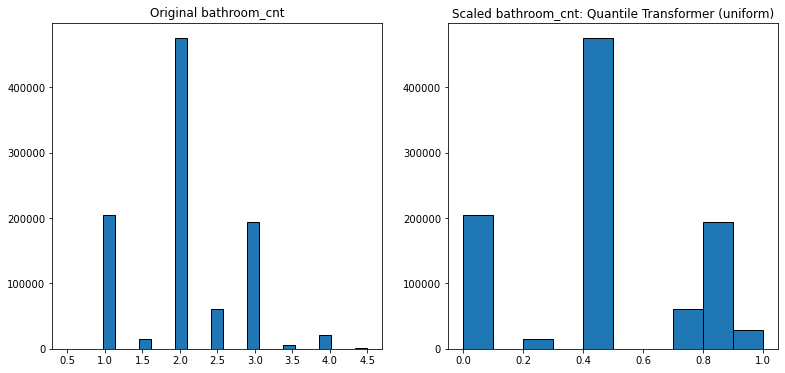

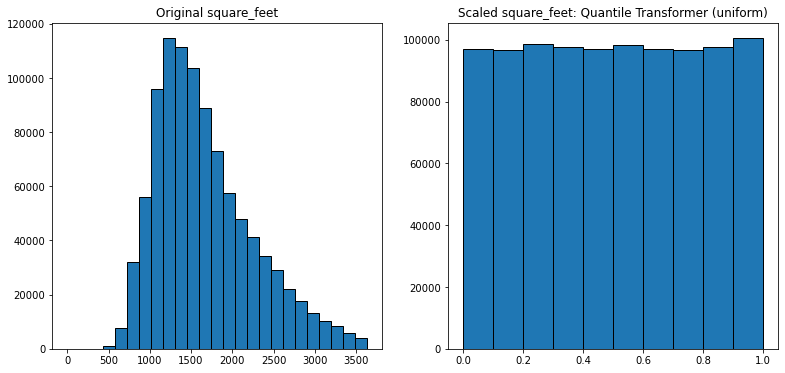

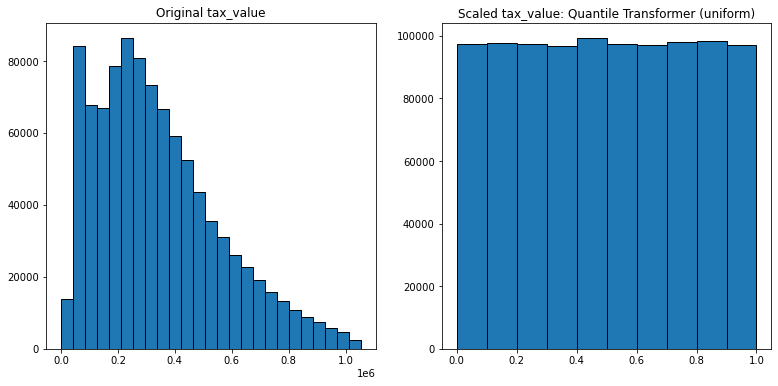

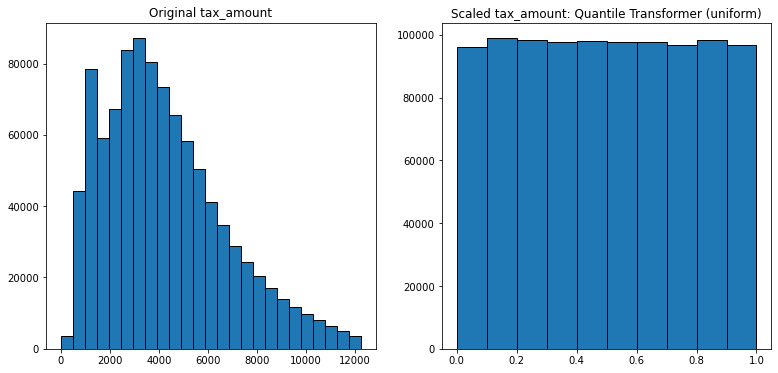

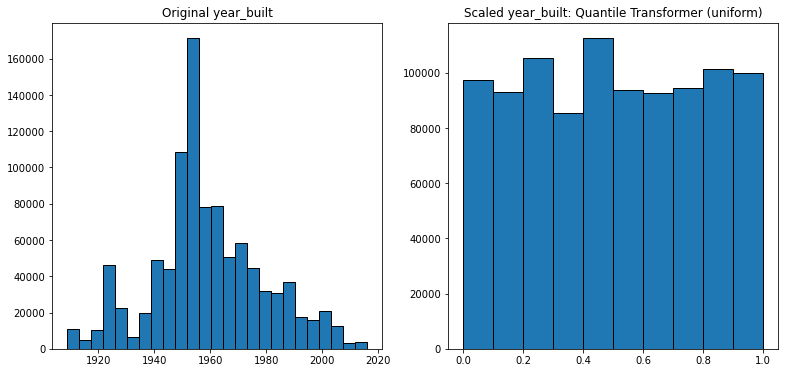

In [61]:
for col in columns:
    scaler = sklearn.preprocessing.QuantileTransformer()
    scaler.fit(train[[col]])
    train_scaled = scaler.transform(train[[col]])
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(train_scaled,  ec='black')
    plt.title(f'Scaled {col}: Quantile Transformer (uniform)')
    plt.show()

## With uniform quantile scaling the outliers are not distinct, basically invisible

## Write function to scale data for zillow data, put in prepare.py

In [62]:
def scale_data(train, validate, test, features_to_scale):
    """Scales Zillow data using MinMax Scaler. 
    Accepts train, validate, and test datasets as inputs as well as a list of the features to scale. 
    Returns dataframe with scaled values added on as columns"""
    
    # Fit the scaler to train data only
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[features_to_scale])
    
    # Generate a list of the new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in features_to_scale]
    
    # Transform the separate datasets using the scaler learned from train
    scaled_train = scaler.transform(train[features_to_scale])
    scaled_validate = scaler.transform(validate[features_to_scale])
    scaled_test = scaler.transform(test[features_to_scale])
    
    # Concatenate the scaled data to the original unscaled data
    train_scaled = pd.concat([train, pd.DataFrame(scaled_train,index=train.index, columns = scaled_columns)],axis=1)
    validate_scaled = pd.concat([validate, pd.DataFrame(scaled_validate,index=validate.index, columns = scaled_columns)],axis=1)
    test_scaled = pd.concat([test, pd.DataFrame(scaled_test,index=test.index, columns = scaled_columns)],axis=1)

    return train_scaled, validate_scaled, test_scaled

In [63]:
features_to_scale = ['square_feet', 'tax_value',
       'year_built', 'tax_amount']

In [64]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, features_to_scale)

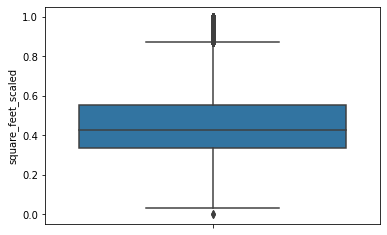

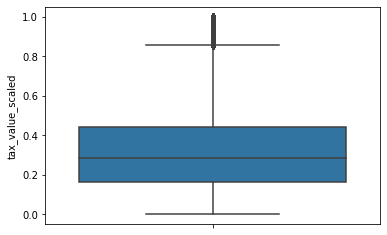

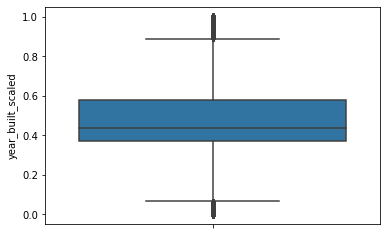

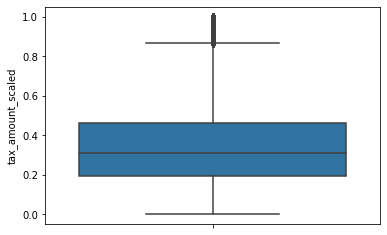

In [65]:
cols = [col for col in train_scaled.columns if 'scale' in col]
for col in cols:
    sns.boxplot(data = train_scaled, y = train_scaled[col])
    plt.show()